In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Leitura de Arquivos

In [41]:
#Economic Freedom World
path_efw = "efw_cc.csv" 

path_bill = "2022_forbes_billionaires.csv"
path_happy = "Happy_2019.csv"
path_HDI = "Human Development Index.csv"
path_suicide = "Suicide_master.csv"

#Arquivos complementares de PIB e População
path_pop = "populationbycountry19802010millions.csv"
path_GDP = "GDP/gdp.csv"
path_GDP_growth = "GDP/gdp_growth.csv"

#Percepção de Corrupção
path_corr = "Corruption/history.csv"

#Melhores Paises para Startups
path_star = "Best Countries/Best Countries for Startups.csv"

#Expectativas de Vida
#path_life = "Life expectancy.csv"

#Gastos Militares em USD
path_militar = "Military Expenditure.csv"

#Salário Mínimo em USD
#path_MW = "MINIMUM_WAGES.csv"

#Unicornios
path_uni = "Unicorns.csv"


In [42]:
data_efw = pd.read_csv(path_efw, sep=',')

data_bill = pd.read_csv(path_bill, sep=',')
data_happy = pd.read_csv(path_happy, sep=',')
data_HDI = pd.read_csv(path_HDI, sep=',')
data_suicide = pd.read_csv(path_suicide, sep=',')

data_pop = pd.read_csv(path_pop, sep=',', index_col = 0)
data_GDP = pd.read_csv(path_GDP, sep=',', index_col = 0)
data_GDP_growth = pd.read_csv(path_GDP_growth, sep=',', index_col = 0)

data_corr = pd.read_csv(path_corr, sep=',')
data_star = pd.read_csv(path_star, sep=',')
#data_life = pd.read_csv(path_life, sep=',')
data_militar = pd.read_csv(path_militar, sep=',')
#data_MW = pd.read_csv(path_MW, sep=',')

data_uni = pd.read_csv(path_uni, sep=',')

In [47]:
data_uni['Country/countries'].unique()

array(['China', 'US', 'US / \xa0Ireland', 'Sweden', 'Australia', 'UK',
       'Bahamas', 'UK / \xa0UAE', 'India', 'Indonesia', 'South Korea',
       'Turkey', 'Ukraine[39]/\xa0United States[40]',
       'China / \xa0Hong Kong', 'Germany', 'Hong Kong / \xa0China',
       'Portugal / \xa0US', 'US[67]', 'Mexico', 'Estonia', 'Canada',
       'Netherlands', 'France', 'Israel', 'India / \xa0US',
       'Australia / \xa0Hong Kong', 'China / \xa0US', 'Colombia',
       'UK / \xa0US', 'Belgium', 'Hong Kong', 'France / \xa0US',
       'Lithuania', 'Austria', 'Brazil', 'Israel / \xa0US', 'Japan',
       'Argentina', 'Vietnam', 'Brazil / \xa0US', 'Bangladesh',
       'US / \xa0Israel', 'Argentina / \xa0US', 'Finland', 'Philippines',
       'Nigeria', 'Portugal / \xa0US [308]', 'Switzerland', 'Denmark',
       'Senegal / \xa0US', 'Israel /  \xa0US', 'Ireland', 'Norway',
       'Nigeria / \xa0US', 'Spain', 'Chile', 'US[362]', 'Thailand', 'USA',
       'Spain / \xa0US', 'Germany / \xa0Russia', 'Czech

# Primeira vizualização e tratamento dos datasets.

In [4]:
#Padronizando Nomes de Estudo
data_efw['countries'] = data_efw['countries'].str.replace('Korea, South', 'South Korea')

data_bill.drop('Unnamed: 0', axis=1, inplace=True)
data_bill.set_index('rank')
data_bill['networth']=data_bill['networth'].str.replace('$','', regex=True)
data_bill['networth']=data_bill['networth'].str.replace(' B','', regex=True)
data_bill['networth']=data_bill['networth'].apply(pd.to_numeric)

data_HDI['Country'][184] = 'Venezuela'
data_HDI['Country'][90] = 'South Korea'

#Removendo Espaços em Branco
data_HDI['Country'] = data_HDI['Country'].str.strip()

data_suicide['country'][data_suicide['country'] == 'Republic of Korea'] = 'South Korea'

data_pop.rename(index={'Korea, South':'South Korea'},inplace=True)

data_GDP.rename(index={'Venezuela, RB':'Venezuela'},inplace=True)
data_GDP.rename(index={'Korea, Rep.':'South Korea'},inplace=True)

data_GDP_growth.rename(index={'Venezuela, RB':'Venezuela'},inplace=True)
data_GDP_growth.rename(index={'Korea, Rep.':'South Korea'},inplace=True)

data_corr["Country"][data_corr["Country"] == 'The United States of America'] = 'United States'
data_corr["Country"][data_corr["Country"] == 'Korea (South)'] = 'South Korea'

In [5]:
datas = [data_efw,
         data_bill, 
         data_happy, 
         data_HDI, 
         data_suicide, 
         data_pop, 
         data_GDP,
         data_corr, 
         data_star, 
         #data_life,
         data_militar,
         data_GDP_growth]
         #data_MW]

In [14]:
#Escolha dos Países a Serem Analizados
countries = np.array(list(set(data_efw.countries).intersection(set(data_bill.country), 
                                                               set(data_happy['Country or region']), 
                                                               set(data_HDI.Country), 
                                                               set(data_suicide.country), 
                                                               set(data_pop.index), 
                                                               set(data_GDP.index),
                                                               set(data_corr.Country), 
                                                               set(data_star.country), 
                                                               set(data_militar.Name),
                                                               set(data_GDP_growth.index))))

array(['Australia', 'Italy', 'Spain', 'Japan', 'Turkey', 'Estonia',
       'Denmark', 'Cyprus', 'New Zealand', 'Hungary', 'Portugal',
       'Kazakhstan', 'South Africa', 'Uruguay', 'Canada', 'Israel',
       'Iceland', 'Singapore', 'Bulgaria', 'Ukraine', 'Georgia',
       'United States', 'France', 'Mexico', 'Colombia', 'Argentina',
       'Chile', 'Thailand', 'Norway', 'Brazil', 'Greece', 'South Korea',
       'Sweden', 'Germany', 'Philippines', 'Belgium', 'Austria', 'Qatar',
       'Switzerland', 'Ireland', 'Poland', 'Finland', 'United Kingdom',
       'Romania'], dtype='<U14')

# Criação dos Dataframes de Estudo.

In [194]:
DF = []
DF_std2 = pd.DataFrame()

for x in range(len(countries)): 
    pais = countries[x]

    # Parcela A
    std = datas[0][datas[0]['countries'] == pais].sort_values(by='year')
    std = std.reset_index()
    a = std.drop(columns=['index','ISO_code']) #, inplace=True)

    # Parcela B e C
    b = datas[1][datas[1]['country'] == pais].groupby(['country']).name.count()
    c = datas[1][datas[1]['country'] == pais].groupby(['country']).networth.sum()

    # Parcela D
    d = datas[2][datas[2]['Country or region'] == pais]

    # Parcela E
    std = datas[3][datas[3]['Country'] == pais].iloc[:,2:].transpose()
    std = std.reset_index()
    std.columns = ['year', 'HDI']
    e = std
    e['year'] = e.year.astype(int)


    # Parcela F
    std = datas[4][datas[4]['country'] == pais]
    std = std.drop(columns=['country', 'sex', 'age', 'country-year', 'suicides/100k pop',
                            'population', 'gdp_per_capita ($)', 'generation'])#, inplace=True)

    #std.iloc[:,4].unique()

    std1 = std.iloc[:,:2].groupby(['year']).sum()
    f0 = std1.reset_index()

    f1 = pd.DataFrame(std.groupby(['year'])['HDI for year'].max())
    f2 = pd.DataFrame(std.groupby(['year'])[' gdp_for_year ($) '].max())
    ff = pd.concat([f1, f2], axis=1)
    ff = ff.reset_index()

    f = pd.concat([f0, ff], axis = 1)
    f.columns = ['year', 'suicides_no', 'year_2', 'HDI_2', 'GDP_2']

    f['GDP_2'] = f['GDP_2'].str.replace(',','')
    f['GDP_2'] = f.GDP_2.astype(float)
    f.drop(columns=['year_2'], inplace=True)

    # Parcela G

    std = pd.DataFrame(datas[5].loc[pais])
    std = std.reset_index()
    std.columns = ['year', 'Population']
    g = std
    g['year'] = g.year.astype(int)

    # Parcela H

    std = pd.DataFrame(datas[6].loc[pais][1:])
    std = std.reset_index()
    std.columns = ['year', 'GDP'] #PIB
    h = std.iloc[:-1]
    h['year'] = h.year.astype(int)
    h['GDP'] = h.GDP.astype(float)

    # Parcela I
    
    std = datas[7][datas[7]['Country'] == pais].iloc[:,4:]
    std.columns = ['2016', '2015', '2014', '2013', '2012']
    std = std.transpose()
    std = std.reset_index()
    std.columns = ['year', 'CPI']
    i = std
    i['year'] = i.year.astype(int)

    # Parcela J

    std = datas[8][datas[8]['country'] == pais].iloc[:,[0,3]].transpose()
    std.columns = ['Startups_Score_2020']
    j = std

    # Parcela K

    std = datas[9][datas[9]['Name'] == pais]
    std = std.iloc[:,4:].transpose()
    std = std.reset_index()
    std.columns = ['year', 'Military_Expenditure_USD']
    k = std
    k['year'] = k.year.astype(int)
    
    # Parcela L

    std = pd.DataFrame(datas[10].loc[pais][1:])
    std = std.reset_index()
    std.columns = ['year', 'GDP_growth'] #Crescimento do PIB
    l = std.iloc[:-1]
    l['year'] = l.year.astype(int)
    l['GDP_growth'] = l.GDP_growth.astype(float)
    
    # 0 3 4 5 6 9 - DF por pais
    # Letras - a e f g h k l

    # 1 2 7 8 - DF todos os paises
    # Letras - b c d i j

    DF2 =  pd.merge(b, c, how = 'outer', on = 'country')
    DF2 = DF2.reset_index()
    d = d.rename(columns={'Country or region': 'country'})
    DF2 =  pd.merge(DF2, d, how = 'outer', on = 'country')
    DF2['Corru_Perc_Index'] = i.iloc[0,1]
    DF2['Startups_Ranking_2020'] = j.iloc[0,0]
    DF2['Startups_Score_2020'] = j.iloc[1,0]
    
    DF_std2 = pd.concat([DF_std2, DF2])
    
    ### Unindo os Dataframes em um Único.

    df_std = pd.merge(a, e, how = 'outer', on = 'year')
    df_std = pd.merge(df_std, f, how = 'outer', on = 'year')
    df_std = pd.merge(df_std, g, how = 'outer', on = 'year')
    df_std = pd.merge(df_std, h, how = 'outer', on = 'year')
    df_std = pd.merge(df_std, k, how = 'outer', on = 'year')
    df_std = pd.merge(df_std, l, how = 'outer', on = 'year')
    df_std = df_std.sort_values(by='year').reset_index(drop=True)
    df_std['HDI_year'] = df_std.loc[:,['HDI','HDI_2']].max(skipna=True, axis=1)
    df_std['GDP_year'] = df_std.loc[:,['GDP','GDP_2']].max(skipna=True, axis=1)

    # Preenchendo os Valores da População Utilizando regressão linear.

    df_inter = df_std.interpolate(method='linear', limit_direction='both', axis=0)
    df = df_inter.loc[:,['year','Population']].dropna(how='any')
    df['Population'] = df['Population'].str.replace('--','0')
    
    X = pd.DataFrame(df.year)
    y = df.Population

    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state = 1)

    model = LinearRegression(fit_intercept = True)
    model.fit(Xtrain, ytrain)
    ypred = model.predict(pd.DataFrame(df_inter.year))

    df_inter['Population_year'] = ypred
 
    # Preenchendo NaN dos paíes
    values = {"countries": pais}
    df_inter = df_inter.fillna(value=values)
    
    # Removendo colunas utilizadas 

    df_inter.drop(columns=['HDI','HDI_2','GDP','GDP_2', 'Population'], inplace=True)

    DF.append(df_inter)

### Unindo todos os DF em um único Parte 1.
DF_std = pd.DataFrame()
for x in range(len(countries)):
    DF_std = pd.concat([DF_std, DF[x]])
    
DF_std['GDP_Per_capita'] = DF_std['GDP_year'] / DF_std['Population_year']
DF_std = DF_std.sort_values(by=['countries', 'year'])
DF_std = DF_std.reset_index(drop=True)


### Unindo todos os DF em um único Parte 2.
DF_std2.columns = ['Country', 'No_billionaires', 'Networth', 'Happy_rank', 'Happy_score',
                   'GDP_per_capita', 'Social_support', 'Life_expectancy',
                   'Freedom_to_make_life_choices', 'Generosity',
                   'Perceptions_of_corruption', 'Corru_perc_index',
                   'Startups_ranking_2020', 'Startups_score_2020']

DF_std2.drop(columns=['GDP_per_capita'], inplace=True)
DF_std2 = DF_std2.sort_values(by='Country')
DF_std2 = DF_std2.reset_index(drop=True)


# Unindo os 2 DF no DF_std2 criando novas colunas com os índices do DF_std

lista = list(DF_std.columns[2:42])
for r in lista:
    item = r
    name = r[:3]
    DF_std2[name +'_'+'1980_2020'] = list(DF_std[DF_std['year'] >= 1980].groupby(['countries'])[r].mean().values)
    DF_std2[name +'_'+'2000_2020'] = list(DF_std[DF_std['year'] >= 2000].groupby(['countries'])[r].mean().values)
    DF_std2[name +'_'+'2010_2020'] = list(DF_std[DF_std['year'] >= 2010].groupby(['countries'])[r].mean().values)

<AxesSubplot:xlabel='year', ylabel='GDP_Per_capita'>

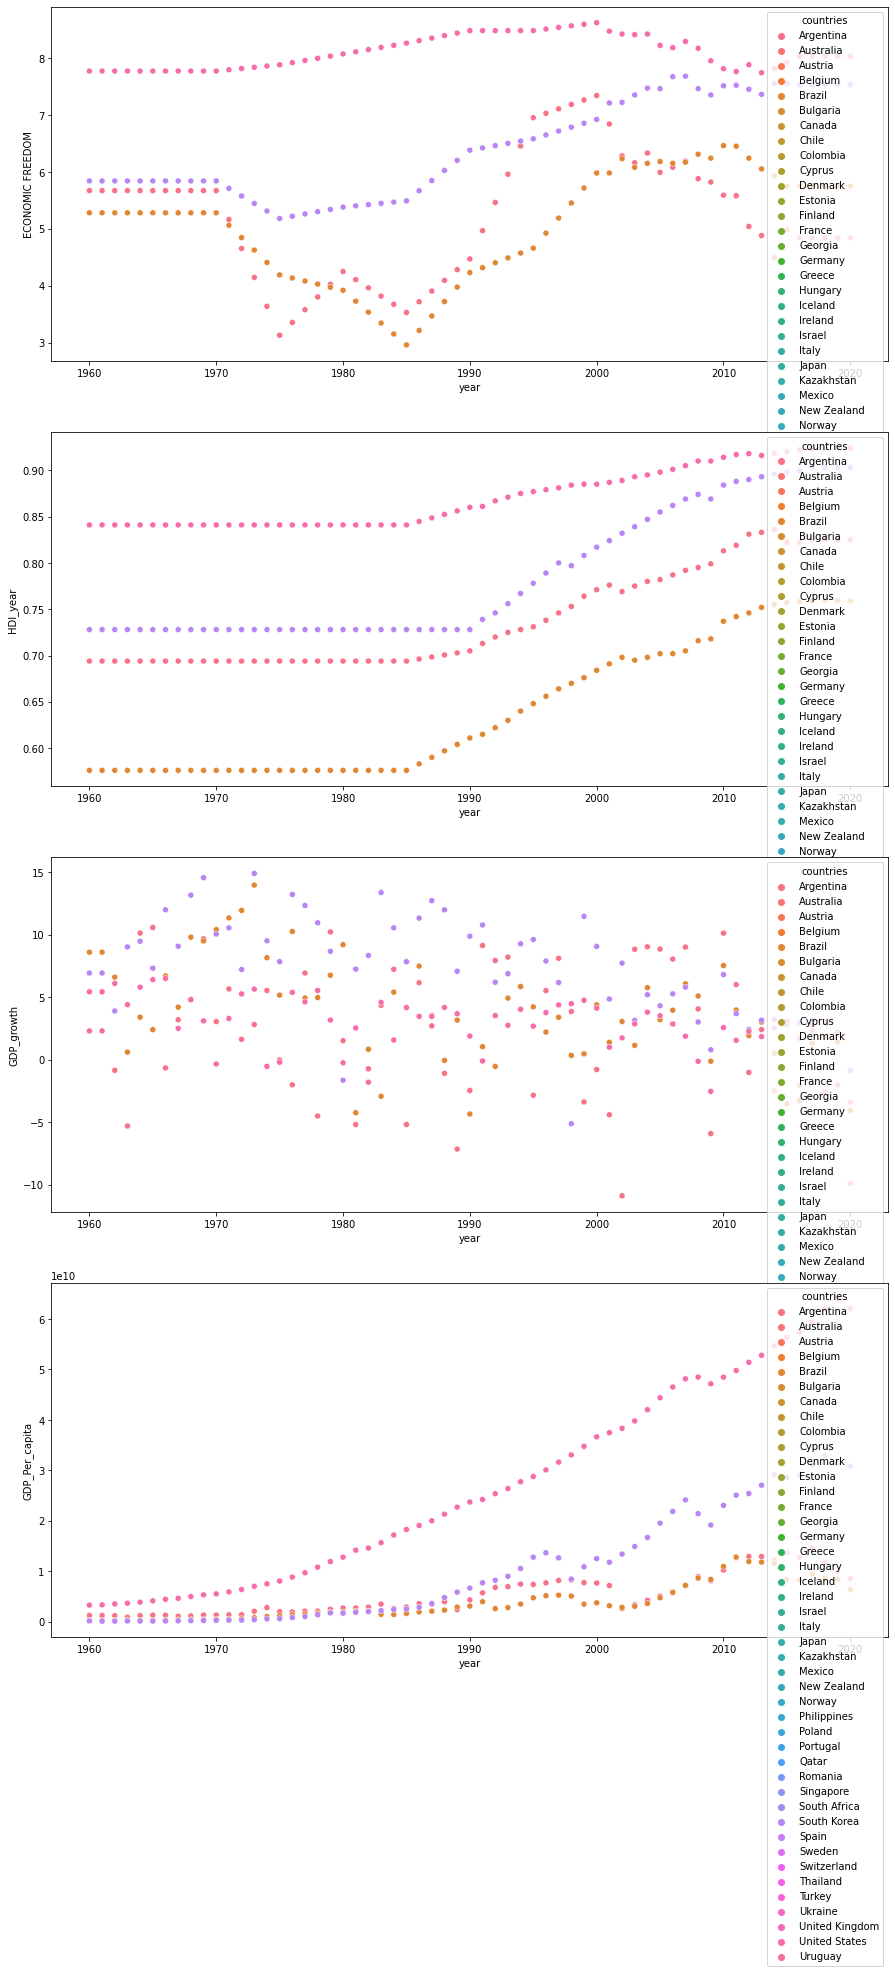

In [80]:
fig, axes = plt.subplots(4, 1, sharex=False, figsize=(15,30))

data = DF_std.loc[DF_std.countries.isin(['Brazil', 'Argentina', 'South Korea', 'United States'])]
sns.scatterplot(ax=axes[0], data = data, x = data['year'] , y = data['ECONOMIC FREEDOM'], hue= DF_std.countries)
sns.scatterplot(ax=axes[1], data = data, x = data['year'] , y = data['HDI_year'], hue= DF_std.countries)
sns.scatterplot(ax=axes[2], data = data, x = data['year'] , y = data['GDP_growth'], hue= DF_std.countries)
sns.scatterplot(ax=axes[3], data = data, x = data['year'] , y = data['GDP_Per_capita'], hue= DF_std.countries)


In [201]:
DF_std2.shape
#list(DF_std2.columns)

(44, 127)